In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
X, y = make_blobs(n_samples=300,  centers=4, cluster_std=0.85,random_state=42)
print("Data preview:")
print(pd.DataFrame(X,columns=['Feature 1','Feature 2']).head())

Data preview:
   Feature 1  Feature 2
0  -9.228785   6.601155
1  -9.569679   6.996651
2  -1.810034   7.976569
3  -7.064656  -5.946149
4 -10.570734   6.466650


In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled=sc.fit_transform(X)
print("\nScaled data preview:")
print(X_scaled[:5])


Scaled data preview:
[[-1.10907525  0.6052409 ]
 [-1.17397016  0.66900543]
 [ 0.30320615  0.82699468]
 [-0.69709775 -1.41772282]
 [-1.36453739  0.58355496]]


In [3]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters=dbscan.fit_predict(X_scaled)
print("\nCluster labels:")
print(clusters[:10])


Cluster labels:
[0 0 1 2 0 2 3 2 1 3]


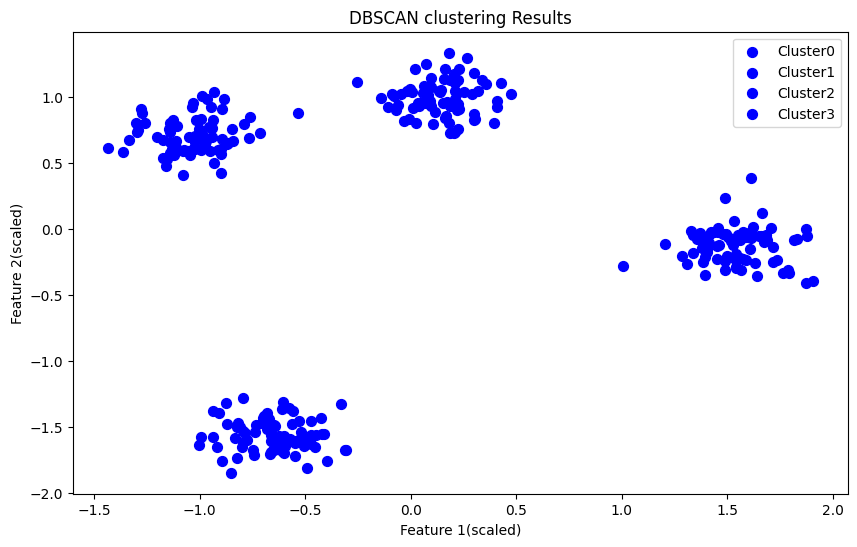

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
plt.figure(figsize=(10,6))
unique_clusters = np.unique(clusters)
plt.cm.viridis(np.linspace(0,1,len(unique_clusters)))
for i,cluster in enumerate(unique_clusters):
    cluster_data=X_scaled[clusters==cluster]
    if cluster==-1:
        plt.scatter(cluster_data[:,0],cluster_data[:,1],s=50,c='red',label='Noise')
    else:
        plt.scatter(cluster_data[:,0],cluster_data[:,1],s=50,c='blue',label=f'Cluster{cluster}')
plt.title('DBSCAN clustering Results')
plt.xlabel('Feature 1(scaled)')
plt.ylabel('Feature 2(scaled)')
plt.legend()
plt.show()

In [5]:
valid_clusters=clusters!=-1
if len(np.unique(clusters[valid_clusters]))>1:
    score=silhouette_score(X_scaled[valid_clusters],clusters[valid_clusters])
    print(f"Silhouette score: {score}")
else:
    print("Silhouette score:Not computable(only 1 cluster)")


Silhouette score: 0.8282672745793694
